In [67]:
import pandas as pd
import numpy as np
import os, os.path as op
import pingouin as pg

In [68]:
data_1 = pd.read_csv(op.join('data', 'listings_1.csv'), sep =',')
data_2 = pd.read_csv(op.join('data', 'listings_2.csv'), sep =',')
data_3 = pd.read_csv(op.join('data', 'listings_3.csv'), sep =',')
data_4 = pd.read_csv(op.join('data', 'listings_4.csv'), sep =',')
data_5 = pd.read_csv(op.join('data', 'listings_5.csv'), sep =',')

In [69]:
data_1.shape

(3900, 10)

In [70]:
data = data_1.append([data_2,data_3,data_4,data_5])

In [71]:
data.head()

,Address,Price,Space,Rooms,Market,Year,Evelevator,Balcony,Level,Parking place
0,"Warszawa, Białołęka, Żerań, ul. Starowiślna",565000.0,41.34,2,wtórny,2019,tak,"ogródek, taras",parter/6,garaż/miejsce parkingowe
1,"Warszawa, Ursynów, Wyczółki",575000.0,43.52,2,wtórny,2021,tak,balkon,4/4,NaN
2,"Warszawa, Śródmieście, Śródmieście Północne, u...",744000.0,37.4,2,wtórny,2011,tak,balkon,2/6,garaż/miejsce parkingowe
3,"Warszawa, Białołęka, ul. Leona Berensona",444845.0,56.8,3,pierwotny,2021,tak,balkon,NaN,garaż/miejsce parkingowe
4,"Warszawa, Praga-Południe, Saska Kępa, ul. Zako...",1700000.0,91.5,4,wtórny,1939,nie,"balkon, ogródek",1/3,NaN


In [72]:
data.shape

(23322, 10)

In [73]:
data.isnull().sum()

Address             0
Price            6042
Space               0
Rooms               0
Market           6275
Year             6275
Evelevator       8423
Balcony          6454
Level             424
Parking place    8165
dtype: int64

In [74]:
data.dtypes

Address           object
Price            float64
Space             object
Rooms              int64
Market            object
Year              object
Evelevator        object
Balcony           object
Level             object
Parking place     object
dtype: object

## Price

In [75]:
price = data.Price

In [76]:
price[:10]

0     565000.0
1     575000.0
2     744000.0
3     444845.0
4    1700000.0
5     655000.0
6     530000.0
7     560000.0
8     325812.0
9     660000.0
Name: Price, dtype: float64

In [77]:
price.isna().sum() / len(price) 

0.2590686905068176

25% rows doesn't have any price value.

In [78]:
price.describe().apply(lambda x: format(x, 'f'))

count        17280.000000
mean       2087052.577894
std       17709396.948748
min          25000.000000
25%         549000.000000
50%         690000.000000
75%         966081.000000
max      904581046.000000
Name: Price, dtype: object

In [79]:
price.dropna(inplace=True)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

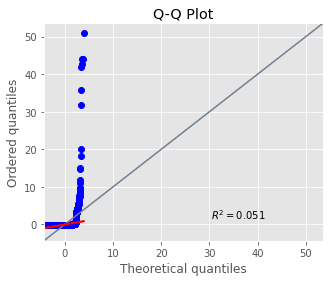

In [81]:
ax = pg.qqplot(price, dist='norm')

In [90]:
price_z = (price - price.mean()) / price.std()
print(len(price_z[price_z> 3]))
print(len(price_z[price_z< -3]))

158
0


In [86]:
suspected_values = price[price_z[price_z> 3].index]
suspected_values

590      92984270.0
590        750000.0
590        670000.0
591      67839940.0
591        540000.0
           ...     
4522     64044510.0
5580     73297912.0
5581     93602776.0
5724    105647817.0
7574    150909048.0
Name: Price, Length: 607, dtype: float64

In [93]:
suspected_values.describe().apply(lambda x: format(x, 'f'))

count          607.000000
mean      31031897.270181
std       88855777.825631
min         239000.000000
25%         580000.000000
50%         869000.000000
75%       56229650.000000
max      904581046.000000
Name: Price, dtype: object

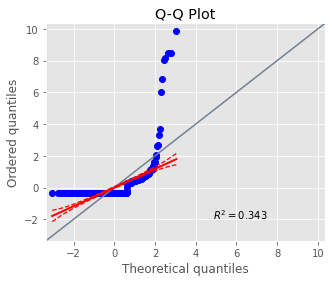

In [91]:
ax = pg.qqplot(suspected_values, dist='norm')

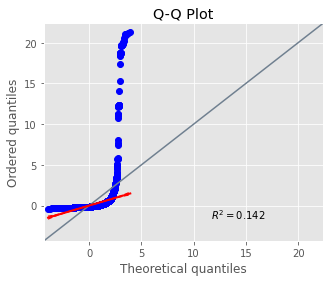

In [97]:
price_without= price.drop(price_z[price_z> 3].index)
ax = pg.qqplot(price_without, dist='norm')

In [101]:
price_without.describe().apply(lambda x: format(x, 'f'))

count       16673.000000
mean      1033281.767108
std       2538621.838970
min         25000.000000
25%        549000.000000
50%        689000.000000
75%        950000.000000
max      55091050.000000
Name: Price, dtype: object

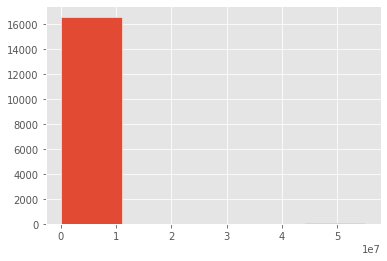

In [100]:
fig, ax = plt.subplots()

ax.hist(price_without, bins=5, linewidth=0.5, edgecolor="white")

plt.show()

In [106]:
price_5mil = price[price < 5000000]

In [107]:
price_5mil.max()

4950000.0

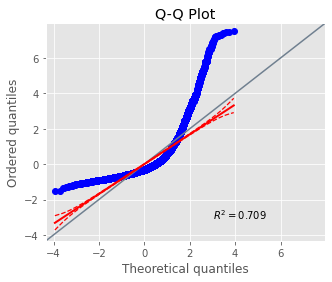

In [110]:
from sklearn import preprocessing
price_normalized = preprocessing.normalize([price_5mil])
ax = pg.qqplot(price_normalized, dist='norm')

## Space

In [111]:
space = data.Space